### Import Liabraries

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 1. Dataset Exploration:
- We'll start by loading and exploring the Fashion MNIST dataset to get a better understanding of its structure and the types of clothing items it contains

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print("training dataset shape = ", train_df.shape)
print("testing dataset shape = ",test_df.shape)

training dataset shape =  (60000, 785)
testing dataset shape =  (10000, 785)


In [6]:
label_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

# Assign labels to indices
test_df = test_df.sample(frac=1).reset_index(drop=True)
unique_labels = test_df['label'].unique()
label_images = [ test_df[test_df['label'] == label].iloc[0] for label in unique_labels]

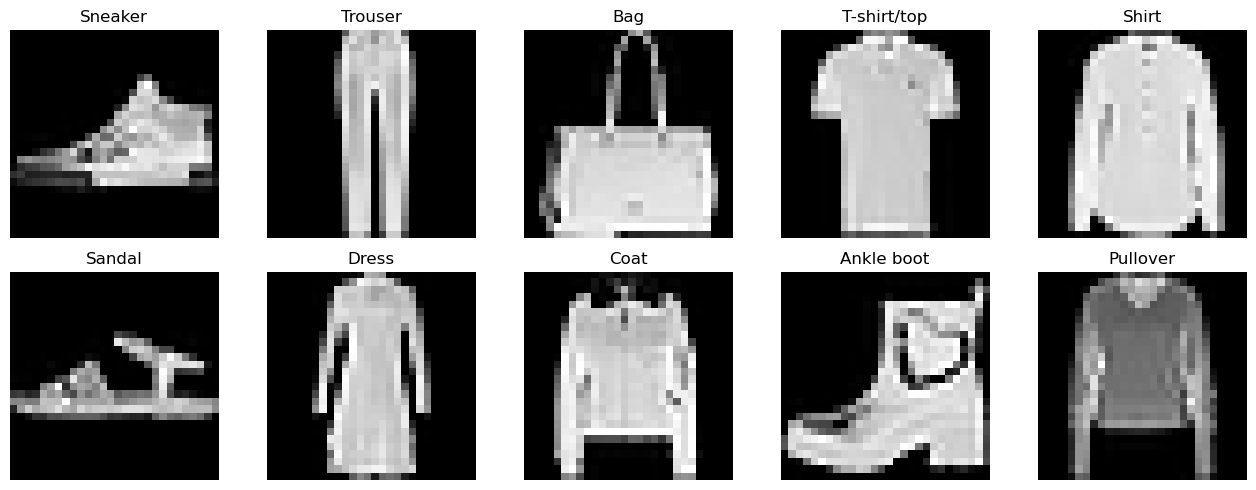

In [7]:
fig, axes = plt.subplots(2, 5, figsize=(13,5))
axes = axes.flatten()

for i, image in enumerate(label_images):
    pixels = image.values[1:]
    pixels = np.array(pixels, dtype=np.uint8).reshape(28, 28)
    axes[i].imshow(pixels, cmap='gray')
    axes[i].set_title(label_names[image['label']])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

## 2. Data Preprocessing:

- We'll prepare the data by normalizing pixel values.

In [8]:
train_img = train_df.drop(["label"], axis=1)
train_label = train_df["label"]
test_img = test_df.drop(["label"], axis=1)
test_label = test_df["label"]

train_img =  train_img / 255
test_img =  test_img / 255

## 3. Model Architecture:
- We'll design the architecture of our neural network using Flatten,Dense and BatchNormalization layers (Basics).

##### Initialize learning rate decay

In [9]:
init_learn_rate = 0.01
lr_decay = ExponentialDecay(
    init_learn_rate,
    decay_steps=50,
    decay_rate=0.9
)

#### Neural Network Architecture¶

In [10]:
tf.random.set_seed(42)

model = tf.keras.Sequential([    
    tf.keras.layers.Dense(units=32, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(units=64, activation="relu",  kernel_regularizer=tf.keras.regularizers.l2(l=0.1)),
    tf.keras.layers.BatchNormalization(), 
    
    tf.keras.layers.Dense(units=128, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(l=0.5)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Dense(units=10, activation="softmax")
])

#### Assign optimizer, loss & Metric

In [11]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate= lr_decay),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"])

# 4. Training the Model:
- We'll train our model architecture using the training data.We'll monitor the training process, including loss and accuracy, to ensure our model is learning effectively.

Epoch 1/30
118/118 [==============================] - 6s 20ms/step - loss: 3.2154 - accuracy: 0.7780 - val_loss: 2.4074 - val_accuracy: 0.1013
Epoch 2/30
118/118 [==============================] - 2s 15ms/step - loss: 0.5935 - accuracy: 0.8335 - val_loss: 2.1820 - val_accuracy: 0.2733
Epoch 3/30
118/118 [==============================] - 2s 16ms/step - loss: 0.5149 - accuracy: 0.8509 - val_loss: 1.5862 - val_accuracy: 0.6211
Epoch 4/30
118/118 [==============================] - 2s 16ms/step - loss: 0.4633 - accuracy: 0.8598 - val_loss: 0.9712 - val_accuracy: 0.8036
Epoch 5/30
118/118 [==============================] - 2s 16ms/step - loss: 0.4376 - accuracy: 0.8654 - val_loss: 0.5687 - val_accuracy: 0.8601
Epoch 6/30
118/118 [==============================] - 2s 17ms/step - loss: 0.4056 - accuracy: 0.8737 - val_loss: 0.4844 - val_accuracy: 0.8576
Epoch 7/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3846 - accuracy: 0.8765 - val_loss: 0.4257 - val_accuracy: 0.8616

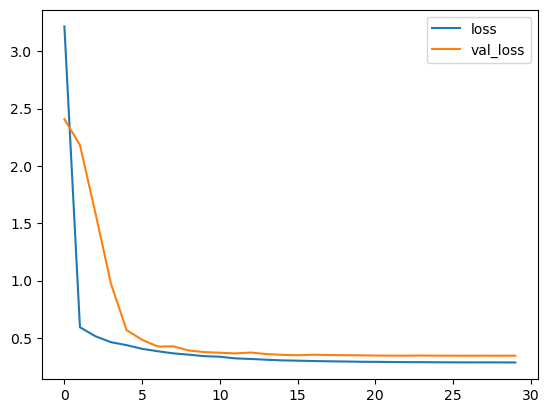

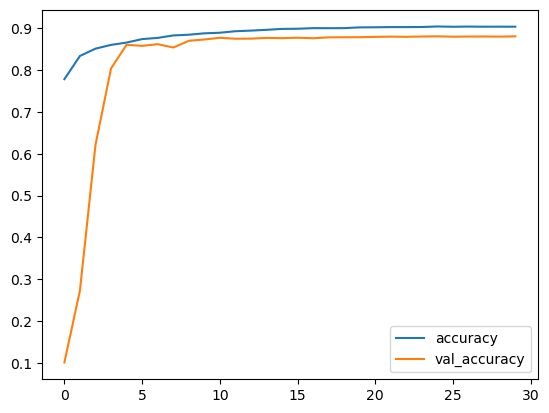

In [12]:
history = model.fit(train_img,train_label,
                    validation_data=(test_img,test_label),
                    epochs=30,
                    batch_size=512,
                    )

history_df =pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();  
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();

# 5. Model Evaluation:
After training, we'll evaluate our model's performance on the testing dataset to measure its accuracy.

In [13]:
test_loss, test_acc = model.evaluate(test_img,  test_label, verbose=2)
print('Test Accuracy:', test_acc*100)

313/313 - 1s - loss: 0.3455 - accuracy: 0.8802 - 885ms/epoch - 3ms/step
Test Accuracy: 88.02000284194946


# 6. Making Predictions:
Once our model is trained, we can use it to make predictions on new, unseen images of clothing items.

In [14]:
pred = model.predict(test_img)

313/313 [==============================] - 1s 2ms/step


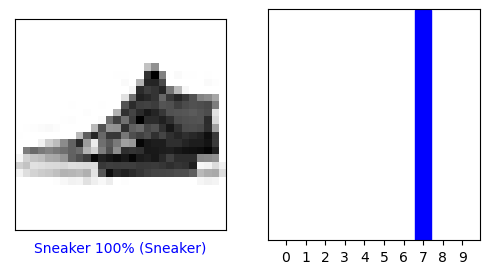

In [15]:
def plot_image(i, predictions_array, true_label, img):
    
    
    
    img= np.array(img)
    true_label, img = true_label[i], img[i].reshape(28,28)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(label_names[predicted_label],
                                100*np.max(predictions_array),
                                label_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_label, test_img)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_label)
plt.show()

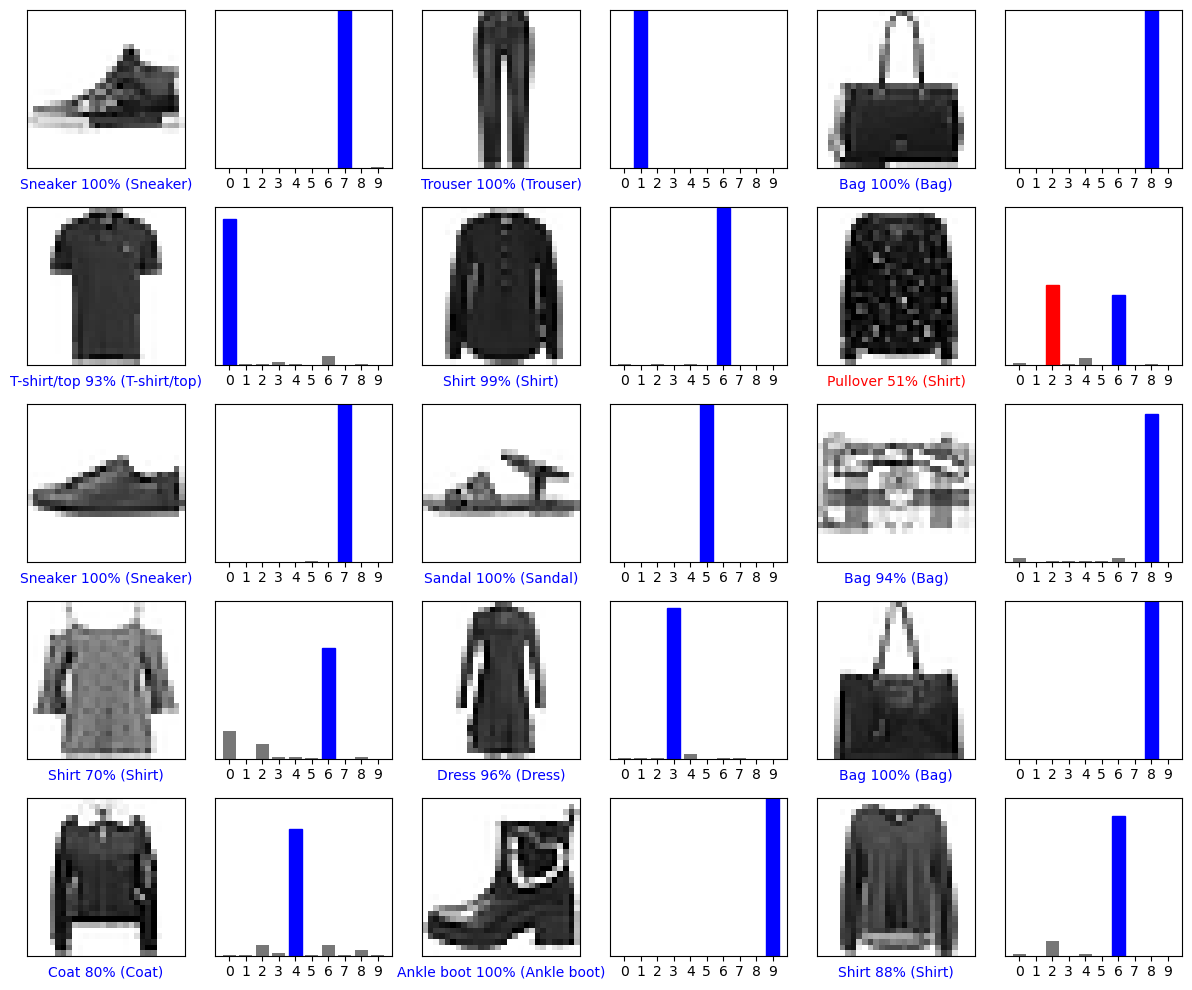

In [16]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred[i], test_label, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred[i], test_label)
plt.tight_layout()
plt.show()

# Accuracy 88%
- using basic simple layer "Dense", it will be better using more effcient layers such as convlotional layers or maxpooling but this for now